In [7]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [8]:
import numpy as np
import pandas as pd

In [9]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [10]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [11]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [19]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [34]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [35]:
Base.metadata.tables['measurement'].columns.keys()

['id', 'station', 'date', 'prcp', 'tobs']

In [36]:
Base.metadata.tables['station'].columns.keys()

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']

In [38]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [39]:
# Create our session (link) from Python to the DB
session = Session(engine)
conn = engine.connect()

# Exploratory Climate Analysis

In [44]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
inspector = inspect(engine)
inspector.get_table_names()


['measurement', 'station']

In [46]:
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [47]:
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [48]:
#how many dates do we have?
session.query(func.count(Measurement.date)).all()

[(19550)]

In [57]:
# Calculate the date 1 year ago from the last data point in the database
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f" Latest date available in Db = {latest_date[0]}")


 Latest date available in Db = 2017-08-23


In [67]:
latest_date_fixed = dt.datetime.strptime(latest_date[0], '%Y-%m-%d')
print(f" {latest_date_fixed}")

 2017-08-23 00:00:00


In [69]:
first_date = dt.date(latest_date_fixed.year -1, latest_date_fixed.month, latest_date_fixed.day)
first_date

datetime.date(2016, 8, 23)

In [82]:
# Perform a query to retrieve the data and precipitation scores
col_scope = [Measurement.date,Measurement.prcp]
data_scope = session.query(*col_scope).filter(Measurement.date >= first_date).all()
data_scope

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [88]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_data_df = pd.DataFrame(data_scope, columns=['Date','Precipitation'])
precip_data_df = precip_data_df.dropna(how = 'any')
precip_data_df = precip_data_df.set_index("Date")
precip_data_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [102]:
# Sort the dataframe by date
precip_data_df_sorted = precip_data_df.sort_values(["Date"], ascending=True)
precip_data_df_sorted.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15


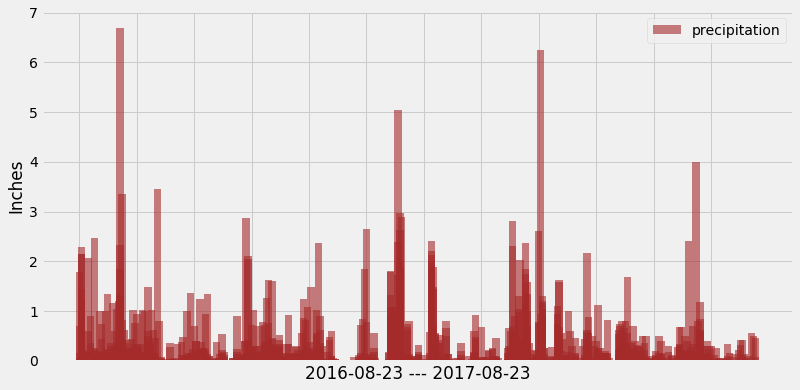

In [192]:
#Plot the results using the DataFrame plot method.
plt.figure(figsize=(12, 6))
plt.bar(xx,yy,width = 4 ,color='brown', alpha=0.6 ,label='precipitation')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
grid_ticks = np.arange(0,370,31)
plt.xticks(grid_ticks)
plt.xlabel(f"{first_date} --- {latest_date[0]}")
plt.ylabel("Inches")
plt.grid(which='major', axis='both', linestyle='-')
plt.legend()
plt.show()


In [194]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_data_df_sorted.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [197]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.id).count()

9

In [201]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
filter_query = [Measurement.station,func.count(Measurement.id)]

activ_stat_query = session.query(*filter_query).group_by(Measurement.station).\
                   order_by(func.count(Measurement.id).desc()).all()
activ_stat_query


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [206]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
act_station_stats       = [func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)]
act_station_stats_query = session.query(*act_station_stats).group_by(Measurement.station).\
                          order_by(func.count(Measurement.id).desc()).first()
act_station_stats_query

(54.0, 85.0, 71.66378066378067)

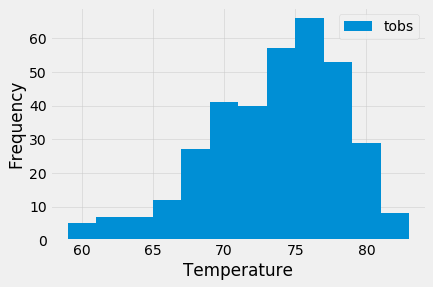

In [226]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
highest_temp_observ      = session.query(Measurement.tobs).filter(Measurement.station == activ_stat_query[0][0]).\
                           filter(Measurement.date >= first_date).all()
highest_temp_observ_list = list(np.ravel(highest_temp_observ))

station_cols = [Station.station,Station.name,Station.latitude,Station.longitude,Station.elevation]
station_data = session.query(*station_cols).all()
station_df   = pd.DataFrame(station_data, columns=['Station','Name','Latitude','Longitude','Elevation'])

station_chosen = station_df.loc[station_df["Station"] == activ_stat_query[0][0],"Name"].tolist()[0]

# # n, bins, patches = plt.hist(temperatures, bins=12,alpha=0.7, rwidth=1.0,label='tobs')
plt.hist(highest_temp_observ_list, bins=12,rwidth=1.0,label='tobs')
plt.grid(axis='both', alpha=0.5)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
